### UAS Kecerdasan Buatan
### M. Wahyu Ramansyah
### 09011181823016

Sumber : https://www.kaggle.com/donghaoqiao/gender-recognition-by-voice-with-python/notebook
Dataset yang digunakan merupakan data voice yang terdiri dari 20 fitur

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pembacaan Dataset

In [2]:
voice = pd.read_csv("voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Mengubah label data
Data yang sebelumnya Female dan Male diubah menjadi 0 dan 1. Female = 0 Male = 1

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

### Visualisasi Data
Berikut contoh visualisasi data antara fitur Spectral Entropy('sp.ent') dan Rata-rata Frekuensi Fundamental('meanfun')

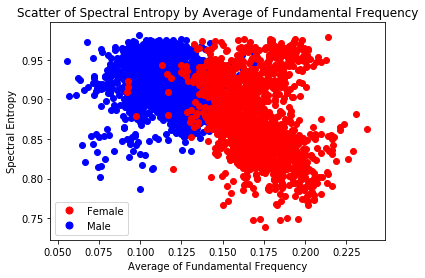

In [5]:
import matplotlib.lines as mlines
red_female = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=7, label='Female')
blue_male = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=7, label='Male')

# create color dictionary
colors = {0:'r',1:'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(voice['meanfun'])):
    ax.scatter(voice['meanfun'][i], voice['sp.ent'][i],color=colors[voice['label'][i]])
ax.legend(handles=[red_female,blue_male])
ax.set_title('Scatter of Spectral Entropy by Average of Fundamental Frequency')
ax.set_xlabel('Average of Fundamental Frequency')
ax.set_ylabel('Spectral Entropy')

### Fitur Scaling
Nilai data 1 dengan data yang lain mungkin mempunyai rentang yang berbeda-beda sehingga diperlukan fitur scaling untuk menyamakan rentang nilai tersebut. Dengan menggunakan MinMaxScaler makan rentang nilai akan berubah menjadi 0 - 1

In [6]:
y = voice.label
x = voice.drop(["label"],axis=1)
minmaxScaler = preprocessing.MinMaxScaler()
x[:]= minmaxScaler.fit_transform(x)
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380


#### Visualisasi setelah dilakukan fitur scaling

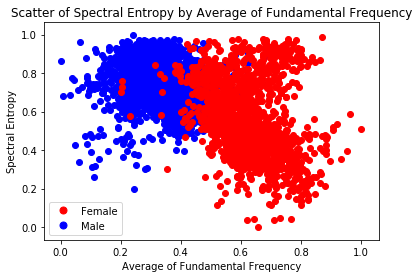

In [7]:
red_female = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=7, label='Female')
blue_male = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=7, label='Male')

# create color dictionary
colors = {0:'r',1:'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(x['meanfun'])):
    ax.scatter(x['meanfun'][i], x['sp.ent'][i],color=colors[y[i]])
ax.legend(handles=[red_female,blue_male])
ax.set_title('Scatter of Spectral Entropy by Average of Fundamental Frequency')
ax.set_xlabel('Average of Fundamental Frequency')
ax.set_ylabel('Spectral Entropy')

### Split Data
Data dibagi menjadi data training dan data testing. Data training = 90% dan Data testing = 10%

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the data
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.1)

### Model SVM Linear
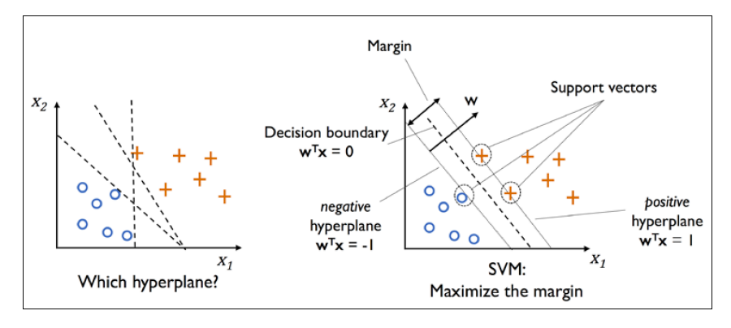

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model =svm.SVC(kernel='linear').fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Akuras data training pada model SVM: ', accuracy_score(y_test,y_pred)*100, '%' )

Akuras data training pada model SVM:  97.79179810725552 %


### Confusion Matrix
Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.
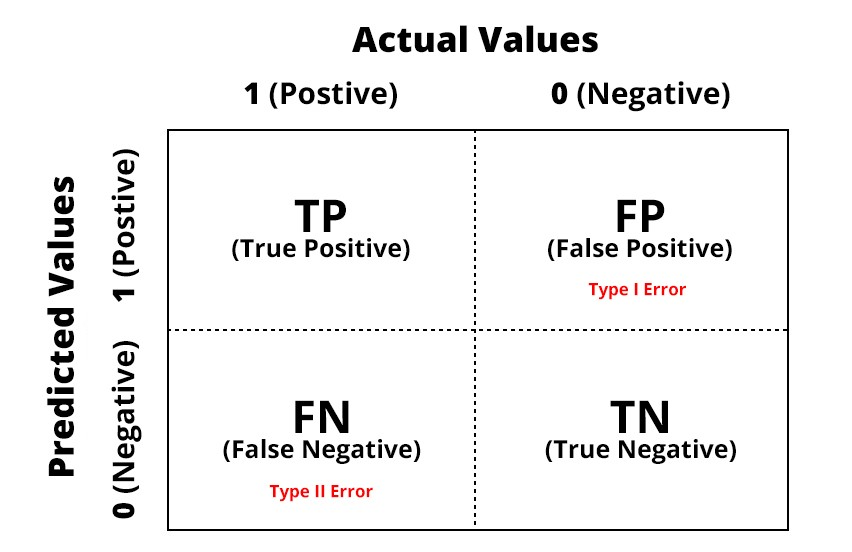

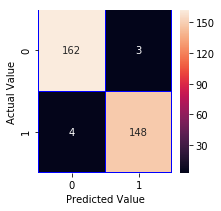

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()